In [71]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from utils.helpers import plot_results
from run import full_train_test

In [ ]:
times_dict = {'BCD': [], 'DFW': []}
accs_dict = {'BCD': [], 'DFW': []}

In [ ]:
N_TRAIN_SAMPLES = 60000
N_VALI_SAMPLES = 10000
N_ITER = 5
N_EPOCHS = 20
BATCH_SIZE = 500

for d in [500, 1000, 1500]:
    _, _, accuracy_test_array, time_array = full_train_test('DFW', N_TRAIN_SAMPLES, N_VALI_SAMPLES, N_ITER,
                                                            N_EPOCHS, BATCH_SIZE, verbose=True, d1=d, d2=d, d3=d)
    times_dict['DFW'].append(sum(time_array) / len(time_array))
    accs_dict['DFW'].append(accuracy_test_array)
    _, _, accuracy_test_array, time_array = full_train_test('BCD', N_TRAIN_SAMPLES, N_VALI_SAMPLES, N_ITER,
                                                            N_EPOCHS, verbose=True, d1=d, d2=d, d3=d)
    times_dict['BCD'].append(sum(time_array) / len(time_array))
    accs_dict['BCD'].append(accuracy_test_array)


In [2]:
with open('results/times.pkl',mode='rb') as f:
    times_dict = pickle.load(f)
with open('results/accs.pkl',mode='rb') as f:
    accs_dict = pickle.load(f)

In [3]:
times_dict

{'BCD': [7.381236124038696, 18.97266082763672, 38.74597883224487],
 'DFW': [179.59737310409545, 179.69333882331847, 200.04312777519226]}

In [4]:
accs_dict

{'BCD': [[0.9156, 0.9183, 0.918, 0.9123, 0.9167],
  [0.9462, 0.9444, 0.945, 0.9442, 0.9461],
  [0.9524, 0.9582, 0.9565, 0.9538, 0.957]],
 'DFW': [[0.9758, 0.9763, 0.9764, 0.9775, 0.9759],
  [0.9781, 0.9761, 0.9782, 0.9784, 0.979],
  [0.9774, 0.9771, 0.978, 0.9759, 0.9769]]}

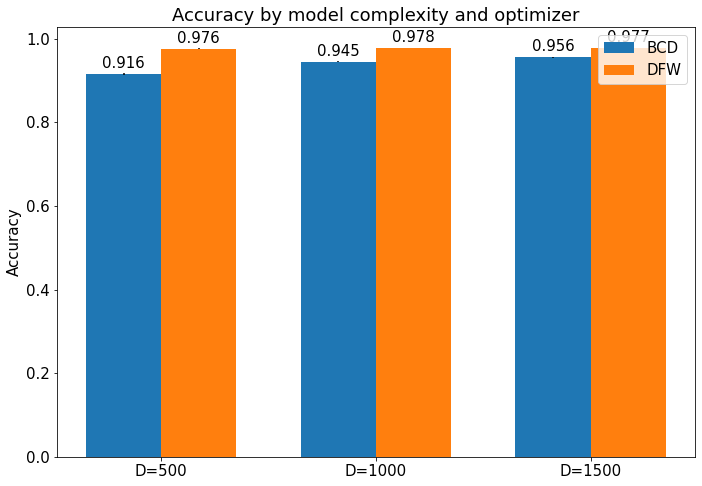

In [67]:
plot_results(accs_dict, ylabel='Accuracy', title='Accuracy by model complexity and optimizer',
                 filename='results/accuracies.pdf')

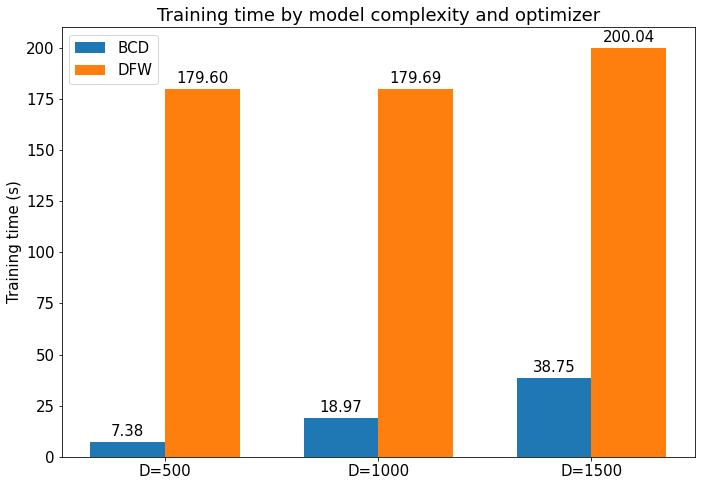

In [69]:
plot_results(times_dict, ylabel='Training time (s)', title='Training time by model complexity and optimizer',
                 filename='results/times.pdf')